<a href="https://colab.research.google.com/github/abhilashhn1993/depression-assessment-on-twitter/blob/Dragon/Code/Final_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re
import string
import datetime

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC

from sklearn import model_selection, naive_bayes, svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [3]:
def performCV(X, Y, model, folds, measure):
  return cross_val_score(model, X, Y, cv=folds, scoring=measure)

In [203]:
from google.colab import files
uploaded = files.upload()

Saving Topics_Only.xlsx to Topics_Only (1).xlsx


In [205]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Topics_Only.xlsx']))

In [206]:
df.head()

,Twitter_handle,LifeStyle,Mental Symptoms,Causes,SwearWords,Physical Symptoms,Treatment,Coping,Target
0,__Siiwe,-0.183931,-0.129494,-0.025080,-0.184917,-0.097570,-0.177434,-0.205812,1
1,_301yung,-0.073237,0.221005,0.255152,0.775777,0.440054,0.382733,-0.081069,1
2,_illust0907,-0.114019,-0.299090,-0.256383,-0.177107,-0.205495,-0.262566,-0.056121,1
3,_niebohater,-0.143149,-0.378235,-0.318656,-0.333317,-0.341400,-0.437937,-0.280657,1
4,_Roxiesaunders,-0.102367,-0.050349,-0.022856,0.400872,0.056322,-0.124652,-0.081069,1


In [207]:
df.shape

(458, 9)

In [208]:
#Data pre-processing
#Leave out Twitter_handle column from the classifier 
df = df.drop(['Twitter_handle'], axis=1)

**###############OPTIONAL(SKIP IF NOT NEEDED)########################**

**Performing One hot encoding to convert categorical features for modeling**

In [148]:
new_cols = ['Age_group','Gender']

In [ ]:
df_proc = pd.get_dummies(df, prefix_sep="_", columns=new_cols)
df_proc.head()

In [150]:
features_for_modeling = list(range(0, df_proc.shape[1]-1))

In [151]:
#Seperate Train and target from the dataframe
df_proc_train = df_proc.iloc[:,features_for_modeling]
df_proc_train = df_proc.drop(['Target'], axis=1)
df_proc_train.head()

,LifeStyle,Mental Symptoms,Causes,SwearWords,Physical Symptoms,Treatment,Coping,Age_group_19-29,Age_group_30-39,Age_group_<=18,Age_group_>=40,Gender_female,Gender_male
0,-0.183931,-0.129494,-0.025080,-0.184917,-0.097570,-0.177434,-0.205812,1,0,0,0,0,1
1,-0.073237,0.221005,0.255152,0.775777,0.440054,0.382733,-0.081069,0,0,1,0,0,1
2,-0.114019,-0.299090,-0.256383,-0.177107,-0.205495,-0.262566,-0.056121,1,0,0,0,0,1
3,-0.143149,-0.378235,-0.318656,-0.333317,-0.341400,-0.437937,-0.280657,1,0,0,0,0,1
4,-0.102367,-0.050349,-0.022856,0.400872,0.056322,-0.124652,-0.081069,1,0,0,0,1,0


In [ ]:
df_proc_target = df_proc.loc[:,['Target']]
df_proc_target.head()

In [153]:
df_proc_train.shape

(458, 13)

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_proc_train,df_proc_target,test_size=0.3)
sum(Test_Y['Target'] == 1)

In [ ]:
Train_Y.Target.value_counts()

**SKIP to classifier after this line of code**

**###############OPTIONAL CODE ENDS########################**

In [209]:
features_for_modeling = list(range(0, df.shape[1]-1))

In [210]:
#Seperate Train and target from the dataframe
df_train = df.iloc[:,features_for_modeling]
df_train = df.drop(['Target'], axis=1)
df_train.head()

,LifeStyle,Mental Symptoms,Causes,SwearWords,Physical Symptoms,Treatment,Coping
0,-0.183931,-0.129494,-0.025080,-0.184917,-0.097570,-0.177434,-0.205812
1,-0.073237,0.221005,0.255152,0.775777,0.440054,0.382733,-0.081069
2,-0.114019,-0.299090,-0.256383,-0.177107,-0.205495,-0.262566,-0.056121
3,-0.143149,-0.378235,-0.318656,-0.333317,-0.341400,-0.437937,-0.280657
4,-0.102367,-0.050349,-0.022856,0.400872,0.056322,-0.124652,-0.081069


In [ ]:
df_target = df.loc[:,['Target']]
df_target.head()

In [ ]:
df_train.shape

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_train,df_target,test_size=0.3)
sum(Test_Y['Target'] == 1)

In [ ]:
Train_Y.Target.value_counts()

**CLASSIFIERS**

**Naive Bayes Classifier**

In [230]:
from sklearn.naive_bayes import GaussianNB
model =  GaussianNB()

In [ ]:
nb = model.fit(Train_X, Train_Y)
y_pred_nb = nb.predict(Test_X)

In [232]:
print("Accuracy:",metrics.accuracy_score(Test_Y, y_pred_nb))

Accuracy: 0.8985507246376812


In [188]:
precision, recall, fscore, support = score(Test_Y, y_pred_nb)
print("Recall: ", recall.mean(), "Precision: ", precision.mean(), "F-score: ", fscore.mean())

Recall:  0.9052521008403361 Precision:  0.9082539682539683 F-score:  0.9055540931824164


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


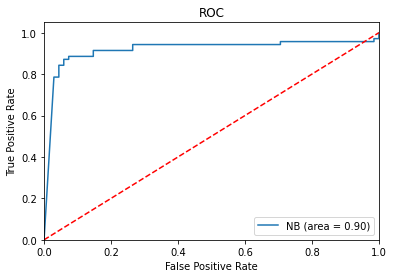

In [233]:
nb_roc_auc = roc_auc_score(Test_Y, model.fit(Train_X, Train_Y).predict(Test_X))
fpr, tpr, thresholds = roc_curve(Test_Y, model.fit(Train_X, Train_Y).predict_proba(Test_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('NB_TopicsOnly')
plt.show()

**NB with Cross Validation**

5 fold CV

In [ ]:
from sklearn.naive_bayes import GaussianNB
model =  GaussianNB()

accuracy_score = performCV(Train_X, Train_Y, model, 5, 'accuracy')
recall_score = performCV(Train_X, Train_Y, model, 5, 'recall')
precision_score = performCV(Train_X, Train_Y, model, 5, 'precision')
f1_score = performCV(Train_X, Train_Y, model, 5, 'f1')

In [235]:
print("Accuracy: ", accuracy_score.mean(), "Recall: ", recall_score.mean(), "Precision: ", 
      precision_score.mean(), "f1-score: ", f1_score.mean())

Accuracy:  0.928125 Recall:  0.8868951612903226 Precision:  0.965977011494253 f1-score:  0.9246888771373172


10 fold CV

In [ ]:
accuracy_score = performCV(Train_X, Train_Y, model, 10, 'accuracy')
recall_score = performCV(Train_X, Train_Y, model, 10, 'recall')
precision_score = performCV(Train_X, Train_Y, model, 10, 'precision')
f1_score = performCV(Train_X, Train_Y, model, 10, 'f1')

In [237]:
print("Accuracy: ", accuracy_score.mean(), "Recall: ", recall_score.mean(), "Precision: ", 
      precision_score.mean(), "f1-score: ", f1_score.mean())

Accuracy:  0.91875 Recall:  0.87375 Precision:  0.959198717948718 f1-score:  0.9131415196779489


**Logistic Regression**

In [ ]:
logreg = LogisticRegression()
logreg.fit(Train_X, Train_Y)

In [241]:
y_pred = logreg.predict(Test_X)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(Test_X, Test_Y)))

Accuracy of logistic regression classifier on test set: 0.8696


In [242]:
precision, recall, fscore, support = score(Test_Y, y_pred)
print("Recall: ", recall.mean(), "Precision: ", precision.mean(), "F-score: ", fscore.mean())

Recall:  0.871218487394958 Precision:  0.8895502645502646 F-score:  0.8682088285229203


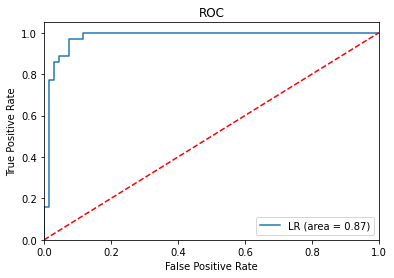

In [243]:
logit_roc_auc = roc_auc_score(Test_Y, logreg.predict(Test_X))
fpr, tpr, thresholds = roc_curve(Test_Y, logreg.predict_proba(Test_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LR (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('LR_TopicsOnly')
plt.show()

**Logistic Regression with Cross Validation**

In [ ]:
logreg = LogisticRegression()

accuracy_score = performCV(Train_X, Train_Y, logreg, 5, 'accuracy')
recall_score = performCV(Train_X, Train_Y, logreg, 5, 'recall')
precision_score = performCV(Train_X, Train_Y, logreg, 5, 'precision')
f1_score = performCV(Train_X, Train_Y, logreg, 5, 'f1')

In [245]:
print("Accuracy: ", accuracy_score.mean(), "Recall: ", recall_score.mean(), "Precision: ", 
      precision_score.mean(), "f1-score: ", f1_score.mean())

Accuracy:  0.871875 Recall:  0.7542338709677419 Precision:  0.9846153846153847 f1-score:  0.8523798581659483


In [ ]:
accuracy_score = performCV(Train_X, Train_Y, logreg, 10, 'accuracy')
recall_score = performCV(Train_X, Train_Y, logreg, 10, 'recall')
precision_score = performCV(Train_X, Train_Y, logreg, 10, 'precision')
f1_score = performCV(Train_X, Train_Y, logreg, 10, 'f1')

In [247]:
print("Accuracy: ", accuracy_score.mean(), "Recall: ", recall_score.mean(), "Precision: ", 
      precision_score.mean(), "f1-score: ", f1_score.mean())

Accuracy:  0.875 Recall:  0.7595833333333333 Precision:  0.9857142857142858 f1-score:  0.8528745970076917


**Combination of Models**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


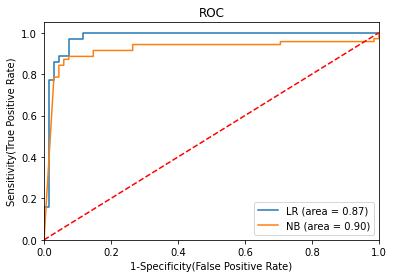

In [248]:
plt.figure()
models = [
          {
              'label': 'LR',
              'model': LogisticRegression(),
          },
          {
              'label': 'NB',
              'model': GaussianNB(),
          }
]

for m in models:
  model = m['model']
  model.fit(Train_X, Train_Y)
  y_pred = model.predict(Test_X)

  fpr, tpr, thresholds = metrics.roc_curve(Test_Y, model.predict_proba(Test_X)[:,1])

  auc = metrics.roc_auc_score(Test_Y, model.predict(Test_X))

  plt.plot(fpr, tpr, label='%s (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot
#plt.figure() 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Combined_TopicsOnly')
plt.show()   # Display

**SVM Classifier**

In [ ]:
svclassifier = SVC(C= 1, kernel='linear', degree=3, gamma="auto")
svclassifier.fit(Train_X, Train_Y)

In [ ]:
# Make prediction
y_pred = svclassifier.predict(Test_X)
# Evaluate our model
print("Accuracy :", accuracy_score(Test_Y['Target'],y_pred), "Recall :",recall_score(Test_Y['Target'],y_pred))

**SVM with cross validation**

In [ ]:
svclassifier = SVC(C= 1, kernel='linear', degree=3, gamma="auto")

accuracy_score = performCV(Train_X, Train_Y, svclassifier, 5, 'accuracy')
recall_score = performCV(Train_X, Train_Y, svclassifier, 5, 'recall')
precision_score = performCV(Train_X, Train_Y, svclassifier, 5, 'precision')
f1_score = performCV(Train_X, Train_Y, svclassifier, 5, 'f1')

In [252]:
print("Accuracy: ", accuracy_score.mean(), "Recall: ", recall_score.mean(), "Precision: ", 
      precision_score.mean(), "f1-score: ", f1_score.mean())

Accuracy:  0.8875 Recall:  0.7729838709677419 Precision:  1.0 f1-score:  0.8707668217434742


In [ ]:
accuracy_score = performCV(Train_X, Train_Y, svclassifier, 10, 'accuracy')
recall_score = performCV(Train_X, Train_Y, svclassifier, 10, 'recall')
precision_score = performCV(Train_X, Train_Y, svclassifier, 10, 'precision')
f1_score = performCV(Train_X, Train_Y, svclassifier, 10, 'f1')

In [255]:
print("Accuracy: ", accuracy_score.mean(), "Recall: ", recall_score.mean(), "Precision: ", 
      precision_score.mean(), "f1-score: ", f1_score.mean())

Accuracy:  0.903125 Recall:  0.80375 Precision:  1.0 f1-score:  0.8871727257211128
